In [1]:
import mylib
import seaborn as sns
from bs4 import BeautifulSoup as bs
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)
import pandas as pd

In [2]:
df=mylib.Describe.describeDf('../DataSet/Data_Train.xlsx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None
              Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


In [3]:
arw=df['Route'].unique()[1][4]
df['Route']=df['Route'].apply(  lambda x : ('/'.join([i for i in x.split(arw)]).replace(" ", "")if(type(x)!=float) else'') )

In [4]:
from joblib import load
pagesrc = load('../DataSet/Routs_objects.h5')
Distance = {}
for i in pagesrc:
        soup = bs(i, 'html.parser')
        value = soup.find('span', class_='value km')
        index = soup.find('a', class_='main-route trip')
        if value is None and index is None:
                continue
        Distance.update({index['href'][1:]: ''.join([i for i in value.text if i != ','])})
df['Distance'] = df['Route'].map(Distance)
df['Distance'] = df['Distance'].astype(float)

In [5]:

def x(z):
        z = z.split(" ")
        if len(z) == 1:
                return int(z[0][:-1]) * 60
        else:
                return (int(z[0][:-1]) * 60) + int(z[1][:-1])


df['Duration'] = df['Duration'].apply(x)
df['Total_Stops'] = df['Total_Stops'].fillna('non-stop')
df['Total_Stops'] = df['Total_Stops'].apply(lambda x: x[0] if x[0] != 'n' else 0)

In [6]:
df.drop(['Date_of_Journey','Source','Destination','Dep_Time','Arrival_Time'],inplace=True,axis=1)

In [7]:
df

,Airline,Route,Duration,Total_Stops,Additional_Info,Price,Distance
0,IndiGo,BLR/DEL,170,0,No info,3897,1710.05
1,Air India,CCU/IXR/BBI/BLR,445,2,No info,7662,1839.05
2,Jet Airways,DEL/LKO/BOM/COK,1140,2,No info,13882,2670.87
3,IndiGo,CCU/NAG/BLR,325,1,No info,6218,1874.45
4,IndiGo,BLR/NAG/DEL,285,1,No info,13302,1743.17
...,...,...,...,...,...,...,...
10678,Air Asia,CCU/BLR,150,0,No info,4107,1546.84
10679,Air India,CCU/BLR,155,0,No info,4145,1546.84
10680,Jet Airways,BLR/DEL,180,0,No info,7229,1710.05
10681,Vistara,BLR/DEL,160,0,No info,12648,1710.05


In [8]:
df['Additional_Info'].replace("No Info",'No info',inplace=True)
df['Additional_Info'].value_counts()

No info                         8348
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [9]:
x=df[df['Additional_Info'].isin(["1 Long layover","Change airports","Red-eye flight"])].index
df.drop(x,inplace=True)

In [10]:
x=df[df['Airline'].isin([k  for k,i  in df['Airline'].value_counts().iteritems() if i <100])].index
df.drop(x,inplace=True)

In [11]:
df['Route'].value_counts()

DEL/BOM/COK        2362
BLR/DEL            1549
CCU/BOM/BLR         979
CCU/BLR             724
BOM/HYD             621
                   ... 
CCU/RPR/HYD/BLR       1
CCU/IXZ/MAA/BLR       1
CCU/VTZ/BLR           1
BOM/CCU/HYD           1
BOM/BBI/HYD           1
Name: Route, Length: 127, dtype: int64

In [12]:
x=df[df['Route'].isin([k  for k,i  in df['Route'].value_counts().iteritems() if i <10])].index
df.drop(x,inplace=True)

In [13]:
mylib.Manipulation.outliers(df,['Distance','Price','Duration'],True)

906


array([[<AxesSubplot:title={'center':'Duration'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Distance'}>, <AxesSubplot:>]],
      dtype=object)

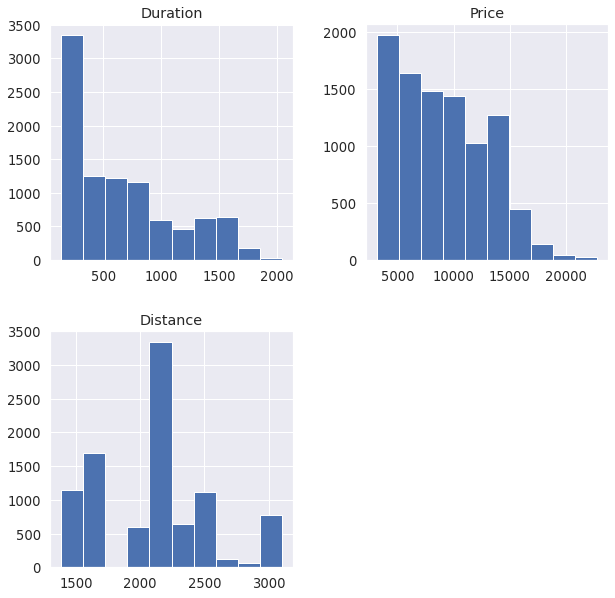

In [14]:
df.hist()

In [15]:
import  mylib as mlb
mlb.Manipulation.outliers(df,['Distance','Duration','Price'],True)

2


array([[<AxesSubplot:title={'center':'Duration'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Distance'}>, <AxesSubplot:>]],
      dtype=object)

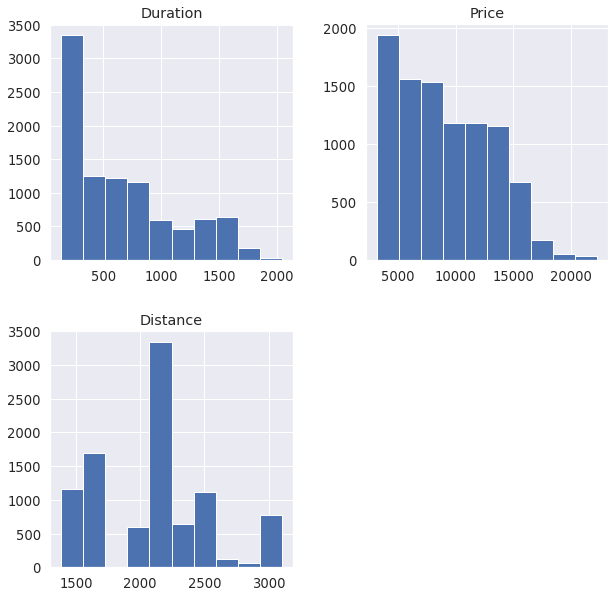

In [16]:
df.hist()

,Duration,Price,Distance
Additional_Info,,,
In-flight meal not included,879.200864,9772.951404,2271.356463
No check-in baggage included,159.454887,3958.421053,1593.500526
No info,608.026013,9057.715486,2107.859556


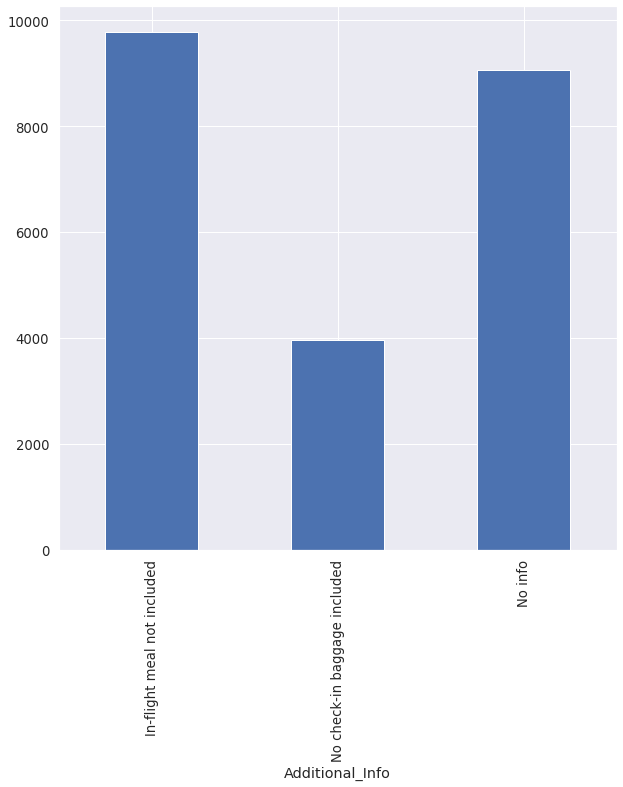

In [17]:
x=df.groupby(df['Additional_Info']).mean()
x['Price'].plot(kind='bar')
x

<AxesSubplot:xlabel='Additional_Info', ylabel='Price'>

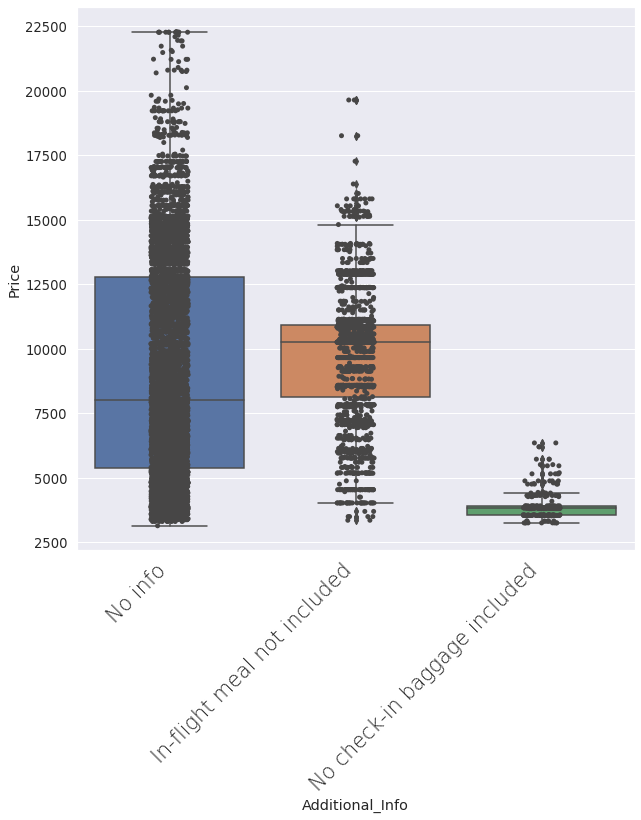

In [18]:
mlb.Visualization.inc_plt()
sns.boxplot(x="Additional_Info", y="Price", data=df)
sns.stripplot(x="Additional_Info", y="Price", color="#474646", size=5, data=df)

In [19]:
df

,Airline,Route,Duration,Total_Stops,Additional_Info,Price,Distance
0,IndiGo,BLR/DEL,170,0,No info,3897,1710.05
2,Jet Airways,DEL/LKO/BOM/COK,1140,2,No info,13882,2670.87
5,SpiceJet,CCU/BLR,145,0,No info,3873,1546.84
6,Jet Airways,BLR/BOM/DEL,930,1,In-flight meal not included,11087,1972.40
7,Jet Airways,BLR/BOM/DEL,1265,1,No info,22270,1972.40
...,...,...,...,...,...,...,...
10678,Air Asia,CCU/BLR,150,0,No info,4107,1546.84
10679,Air India,CCU/BLR,155,0,No info,4145,1546.84
10680,Jet Airways,BLR/DEL,180,0,No info,7229,1710.05
10681,Vistara,BLR/DEL,160,0,No info,12648,1710.05


In [20]:
# from datashader import Pipeline
ohe_cols=['Airline','Route','Additional_Info']
# from  sklearn.preprocessing import  OneHotEncoder
# onehotencoder=OneHotEncoder()
# features=onehotencoder.fit_transform(df[x]).toarray()

In [21]:
# Cols=[]
# c=0
# for i in onehotencoder.categories_:
#      for x in i:
#         Cols.append(x[c]+'_'+x )
#      c+=1
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df

,Airline,Route,Duration,Total_Stops,Additional_Info,Price,Distance
0,IndiGo,BLR/DEL,170,0,No info,3897,1710.05
1,Jet Airways,DEL/LKO/BOM/COK,1140,2,No info,13882,2670.87
2,SpiceJet,CCU/BLR,145,0,No info,3873,1546.84
3,Jet Airways,BLR/BOM/DEL,930,1,In-flight meal not included,11087,1972.40
4,Jet Airways,BLR/BOM/DEL,1265,1,No info,22270,1972.40
...,...,...,...,...,...,...,...
9494,Air Asia,CCU/BLR,150,0,No info,4107,1546.84
9495,Air India,CCU/BLR,155,0,No info,4145,1546.84
9496,Jet Airways,BLR/DEL,180,0,No info,7229,1710.05
9497,Vistara,BLR/DEL,160,0,No info,12648,1710.05


In [30]:
y,X=df['Price'],df.drop(['Price'],axis=1)


In [31]:
X

,Airline,Route,Duration,Total_Stops,Additional_Info,Distance
0,IndiGo,BLR/DEL,170,0,No info,1710.05
1,Jet Airways,DEL/LKO/BOM/COK,1140,2,No info,2670.87
2,SpiceJet,CCU/BLR,145,0,No info,1546.84
3,Jet Airways,BLR/BOM/DEL,930,1,In-flight meal not included,1972.40
4,Jet Airways,BLR/BOM/DEL,1265,1,No info,1972.40
...,...,...,...,...,...,...
9494,Air Asia,CCU/BLR,150,0,No info,1546.84
9495,Air India,CCU/BLR,155,0,No info,1546.84
9496,Jet Airways,BLR/DEL,180,0,No info,1710.05
9497,Vistara,BLR/DEL,160,0,No info,1710.05


In [32]:
y

0        3897
1       13882
2        3873
3       11087
4       22270
        ...  
9494     4107
9495     4145
9496     7229
9497    12648
9498    11753
Name: Price, Length: 9499, dtype: int64

In [ ]:
....

In [34]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import numpy as np

col_transform = ColumnTransformer(transformers=[('cat', OneHotEncoder(), ['Airline','Route']),
                                              ('le',LabelEncoder(),['Additional_Info']),
                                              ('mx',MinMaxScaler(),['Price','Distance','Duration'])]
                                               , remainder='passthrough')
model = SVR(kernel='rbf',gamma='scale',C=100)
pipeline = Pipeline(steps=[('prep',col_transform), ('m', model)])
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1,error_score='raise')
scores = np.absolute(scores)
print('MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

ValueError: A given column is not a column of the dataframe

In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

s = pd.DataFrame(data={'Category': ['A', 'A', np.nan, 'B']})

category_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(drop='if_binary')),
    ('le', LabelEncoder())
]
)

transformer = ColumnTransformer(
    transformers=[
    ('category', category_pipeline , ['Category'])
],
)

transformer.fit_transform(s)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


In [ ]:
from  sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
df[['Duration','Distance']]= trans.fit_transform(df[['Duration','Distance']])

In [ ]:
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model =  RandomForestRegressor(n_estimators=100,max_depth=60)


model.fit(x_train, y_train)
y_pred = model.predict(x_test)
yt_pred = model.predict(x_train)

print(f'Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Testing MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'Testing R2: {r2_score(y_test, y_pred)}')


print(f'Testing RMSE: {np.sqrt(mean_squared_error(y_train, yt_pred))}')
print(f'Testing MAE: {mean_absolute_error(y_train, yt_pred)}')
print(f'Testing R2: {r2_score(y_train, yt_pred)}')